- Valor medio = Valor de la pendiente, dentro del intervalox 
- Iteraciones de punto fijo
- Punto fijo como un atractor
- Unicidad del punto fijo
- Teorema del punto fijo

Iniciemos entendiendo el teorema del valor intermedio:

Sea $f:[a, b] \rightarrow \mathbb{R}$ una función continua en el intervalo cerrado $[a, b]$ y diferenciable en el intervalo abierto $(a, b)$ con $a<b$ entonces existe al menos algún punto $c \in(a, b)$ tal que
$$
f^{\prime}(c)=\frac{f(b)-f(a)}{b-a}
$$


Veamos algunas funciones, para visualizar el teorema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

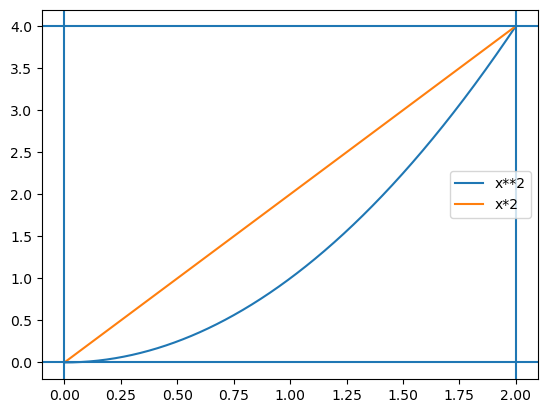

In [71]:
f = lambda x: x**2
df = lambda x: 2*x 
xs = np.arange(0, 2, 0.0025)
plt.plot(xs, f(xs), label = "x**2")
plt.plot(xs, xs *2, label = "x*2")
plt.axhline(0); plt.axhline(4)
plt.axvline(0); plt.axvline(2)


plt.legend()

Para este caso tenemos que $f^\prime(c) = \frac{f(2) -f(0)}{2-0} = \frac{4}{2} = 2$

Si $f:[a, b] \rightarrow \mathbb{R}$ es una función continua en un intervalo cerrado $[a, b]$, derivable en el intervalo abierto $(a, b)$ y $f(a)=f(b)$, entonces existe al menos un punto $c \in(a, b)$ tal que:
$$
f^{\prime}(c)=0
$$

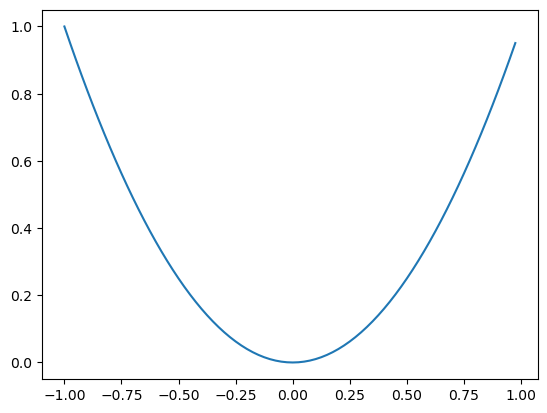

In [13]:
f = lambda x: x**2
xs = np.arange(-1,1, 0.025)
plt.plot(xs, f(xs))

- Aquí ya podemos ver ciertas intuciones, de que el teorema quiere asegurar el punto medio de la función en un intervalo dado. Siendo la función continua

Veamos mas ejemplos de esto:

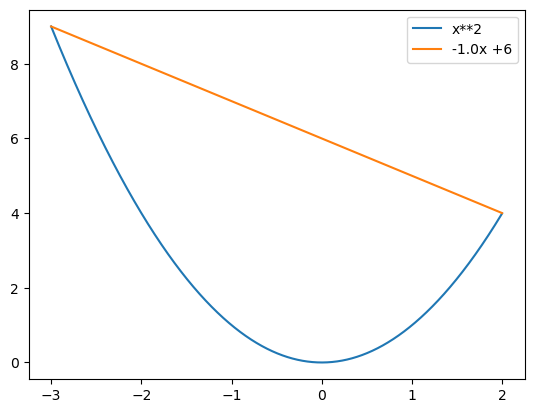

In [70]:
f = lambda x: x**2
a, b = -3, 2
fd_c = (f(b)-f(a)) /(b-a)
xs = np.arange(a, b, 0.0025)
plt.plot(xs, f(xs), label = "x**2")
plt.plot(xs, xs *fd_c +6, label = f"{fd_c}x +6")
plt.legend()

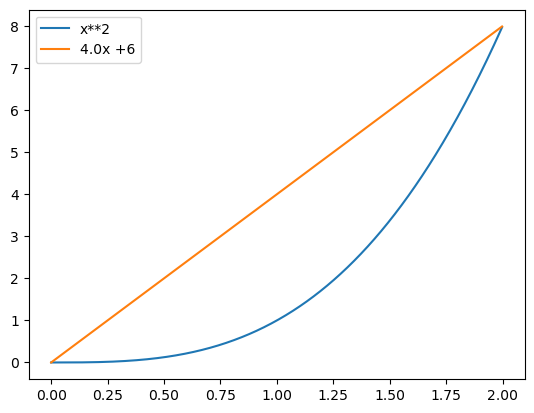

In [73]:
f = lambda x: x**3
a, b = 0, 2
fd_c = (f(b)-f(a)) /(b-a)
xs = np.arange(a, b, 0.0025)
plt.plot(xs, f(xs), label = "x**2")
plt.plot(xs, xs *fd_c , label = f"{fd_c}x +6")
plt.legend()

Ahora veamos porque el punto fijo es único si la derivada en el intervalo es menor que uno

1.0


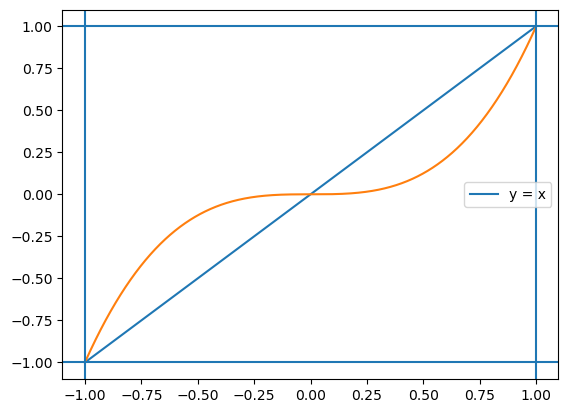

In [98]:
r = lambda x: x
f = lambda x: x**3
a, b = -1, 1
df_c = (f(b)-f(a)) /(b-a); print(df_c)
xs = np.arange(a, b, 0.002)
plt.plot(xs, xs, label = "y = x")
plt.plot(xs, f(xs))
plt.legend()
plt.axvline(a)
plt.axvline(b)

plt.axhline(a)
plt.axhline(b)

- Si tiene dos puntos fijos, quiere decir, que hay una recta con pediente uno que pasa por ellos dos. Así, si restringimos la derivada. Ya no se puede formar esta recta, es decir no tenemos mas de un punto fijo. 

### Preguntas

- Cual es la intución, de, si la derivada es menor a uno, existe un solo punto fijo.

Si, además, $g^{\prime}(x)$ existe en $(a, b)$ y hay una constante positiva $k<1$ con $\left|g^{\prime}(x)\right| \leq k, \quad$ para todas las $x \in(a, b)$, entonces, existe exactamente un punto fijo en $[a, b]$.

#### Prueba

Suponga, además, que $\left|g^{\prime}(x)\right| \leq k<1$ y que $p$ y $q$ son puntos fijos en $[a, b]$. Si $p \neq q$, entonces el teorema de valor medio implica que existe un número $\xi$ entre $p$ y $q$ y por lo tanto en $[a, b]$ con
$$
\frac{g(p)-g(q)}{p-q}=g^{\prime}(\xi) .
$$

Por lo tanto
$$
|p-q|=|g(p)-g(q)|=\left|g^{\prime}(\xi)\right||p-q| \leq k|p-q|<|p-q|,
$$
lo cual es una contradicción. Esta contradicción debe provenir de la única suposición $p \neq q$. Por lo tanto, $p=q$ y el punto fijo en $[a, b]$ es único.

### Esto es una condición suficiente pero no necesaria

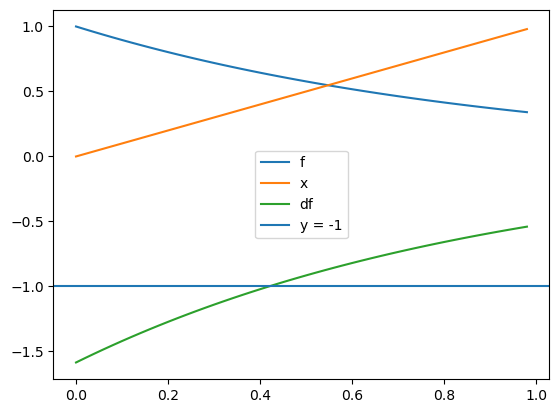

In [114]:
f = lambda x: 3**(-x)
df = lambda x: -3**(-x)* np.log2(3)
r = lambda x: x
a, b = 0, 1
xs = np.arange(a,b, 0.02)
plt.plot(xs, f(xs), label = "f")

plt.plot(xs,r(xs), label = "x")
plt.plot(xs, df(xs), label = "df")

plt.axhline(-1, label= "y = -1")
plt.legend()

- Aquí podemos ver que el punto fijo es unico en el intervalo, pero no cumple la condición de la derivada, por lo tanto, esta condición es suficiente pero no necesaria

### Algoritmo

In [117]:
def punto_fijo(f,p_0, TOL = 1e-5, iter = 10)->tuple[int, int]:
    "Salida: (iter, ans)"
    i = 0
    while i<iter:
        p = f(p_0)
        if abs(p - p_0)<TOL: return (i,p)
        i +=1 
        p_0 = p
    return (i, p)

In [118]:
f = lambda x: 3**(-x)
p_0 = 0.2
i, ans = punto_fijo(f, p_0)

print(f"En {i} iteraciones tenemos la aproximacion: {ans}")

En 10 iteraciones tenemos la aproximacion: 0.5454041583759588


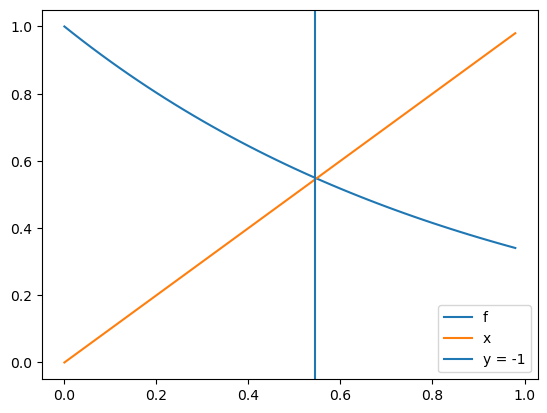

In [120]:
f = lambda x: 3**(-x)
r = lambda x: x
a, b = 0, 1
xs = np.arange(a,b, 0.02)
plt.plot(xs, f(xs), label = "f")
plt.plot(xs,r(xs), label = "x")


plt.axvline(ans, label= "y = -1")
plt.legend()

In [127]:
def punto_fijo_list(f,p_0, TOL = 1e-5, iter = 10)->tuple[int, int, list]:
    "Salida: (iter, ans)"
    i = 0
    l = list()
    while i<iter:
        p = f(p_0); l.append(p_0)
        if abs(p - p_0)<TOL: return (i,p)
        i +=1 
        p_0 = p
    return (i, p, l)

In [129]:
f = lambda x: 3**(-x)
p_0 = 0.2
i, ans, lista = punto_fijo_list(f, p_0)

lista

[0.2,
 0.8027415617602307,
 0.4139948501959446,
 0.6345622868188386,
 0.49800860338933395,
 0.5786147631060865,
 0.5295788085891938,
 0.5588904572955385,
 0.5411796828032056,
 0.5518126734982783]

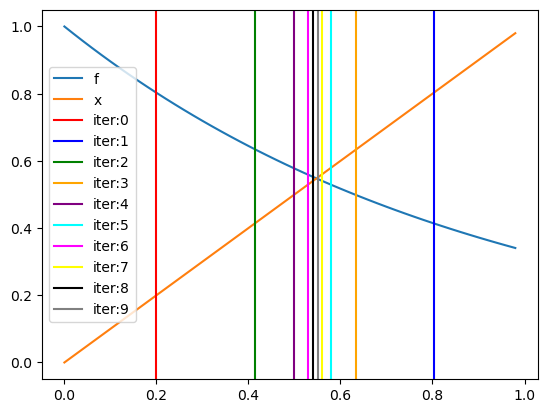

In [141]:
f = lambda x: 3**(-x)
r = lambda x: x
a, b = 0, 1
xs = np.arange(a,b, 0.02)
plt.plot(xs, f(xs), label = "f")
plt.plot(xs,r(xs), label = "x")

colores = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'gray']

for i,aprox in enumerate (lista):
    plt.axvline(aprox, label= f"iter:{i}", color=colores[i % len(colores)])
plt.legend()

-  La intución de esto parece que sube y baja por el punto fijo hasta que hace demasiado pequeño el intervalo lo que hace que aproxime el punto fijo.

### Mas ejemplos

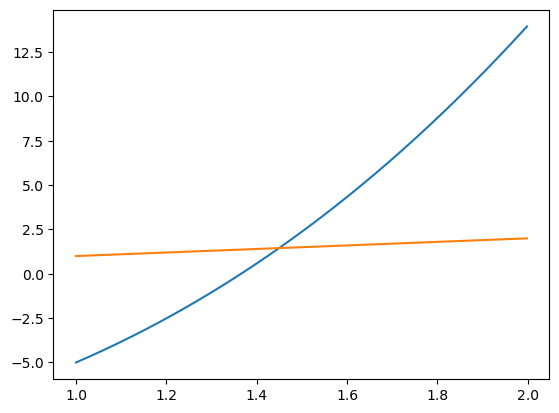

In [142]:
f = lambda x: x**3 + 4*x**2 -10
r = lambda x: x
a, b = 1, 2
xs = np.arange(a,b, 0.002)

plt.plot(xs, f(xs)); plt.plot(xs, r(xs))

¿Cumple el teorema?

- Continua.
- Derivada menor a uno y mayor que menos uno.

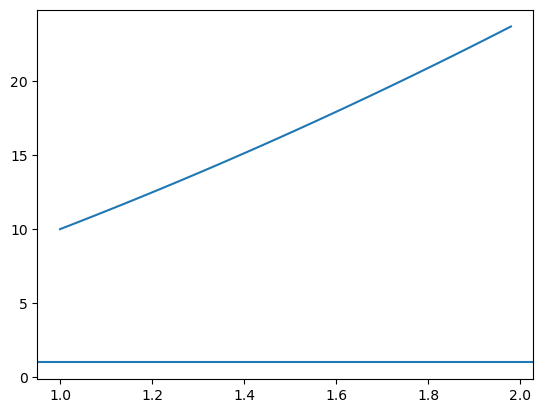

In [144]:
df = lambda x: 2*x**2 + 8*x
a, b = 1, 2
xs = np.arange(a,b, 0.02)
plt.plot(xs, df(xs))

plt.axhline(1)

-  ¿Podemos encontrar una aproximación?, que no cumple una de las condiciones.

In [159]:
def punto_fijo_list(f,p_0, TOL = 1e-5, iter = 10)->tuple[int, int, list]:
    "Salida: (iter, ans)"
    i = 0
    l = list()
    while i<iter:
        p = f(p_0) ;l.append(p_0)
        if abs(p - p_0)<TOL: return (i,p)
        i +=1 
        p_0 = p
    return (i, p, l)

In [165]:
f = lambda x: x**3 + 4*x**2 -10
p_0 = 1.2
i, ans, lista = punto_fijo_list(f, p_0, iter=5)

lista

[1.2,
 -2.5120000000000005,
 -0.6105057280000015,
 -8.736677036654783,
 -371.54831133105523]

In [173]:
f = lambda x: x**3 + 4*x**2 -10
p_0 = 1.6
i, ans, lista = punto_fijo_list(f, p_0, iter=5)
lista

[1.6,
 4.336000000000002,
 146.7242690560002,
 3244783.7418013304,
 3.416314208204334e+19]

- Para este ejemplo, el algoritmo falla ya que podemos ver que da numeros alejados al punto fijo que podemos apreciar en la grafica de arriba.
- Podemos manipular la ecuación.

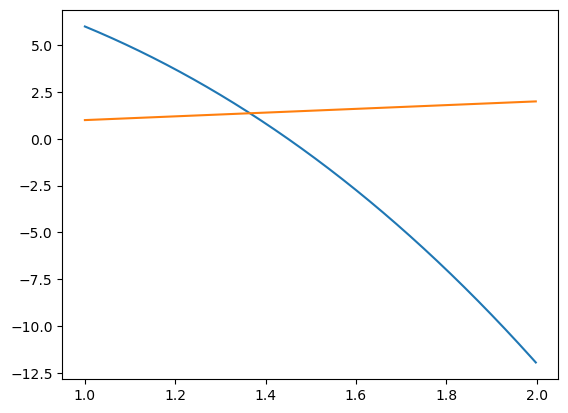

In [174]:
f = lambda x: x - x**3 - 4*x**2 +10
r = lambda x: x
a, b = 1, 2
xs = np.arange(a,b, 0.002)

plt.plot(xs, f(xs)); plt.plot(xs, r(xs))

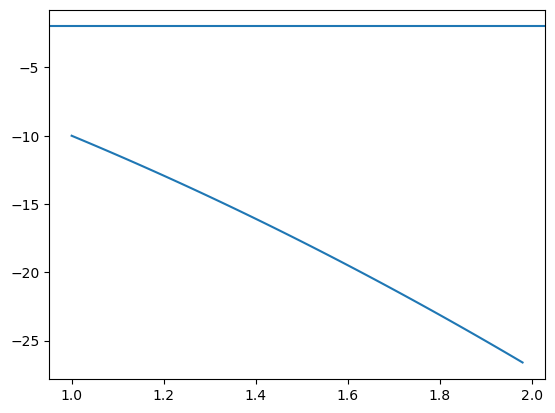

In [176]:
df = lambda x: 1- 3*x**2 -8*x
xs = np.arange(1,2, 0.02)
plt.plot(xs, df(xs))
plt.axhline(-2)

- No cumple el criterio de la derivada.

In [183]:
f = lambda x: x - x**3 - 4*x**2 +10
p_0 = 1.2
i, ans, lista = punto_fijo_list(f, p_0, iter=6)

lista

[1.2,
 3.7120000000000006,
 -92.55121612800005,
 758423.0453846961,
 -4.362514198141156e+17,
 8.302532040004027e+52]

- Con esta función no conseguimos la aproximacion.

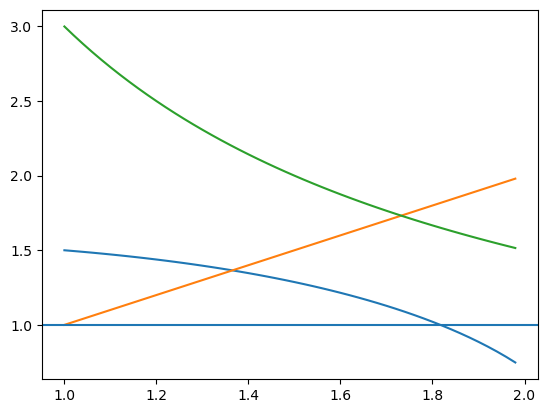

In [193]:
f = lambda x : (1/2)* (10- x**3)**(1/2) # df=  (1/2)* (-1/2) (-3*x**2)**(-1/2) = 3*x**-1
r = lambda x: x
df = lambda x: 3*x**-1
a,b =1, 2
xs = np.arange(a, b, 0.02)
plt.plot(xs, f(xs)); plt.plot(xs, r(xs)); plt.plot(xs, df(xs))
plt.axhline(1)

In [196]:
p_0 = 1
i, ans, lista = punto_fijo_list(f, p_0, iter=10)
lista


[1,
 1.5,
 1.286953767623375,
 1.4025408035395783,
 1.3454583740232942,
 1.3751702528160383,
 1.360094192761733,
 1.3678469675921328,
 1.3638870038840212,
 1.36591673339004]

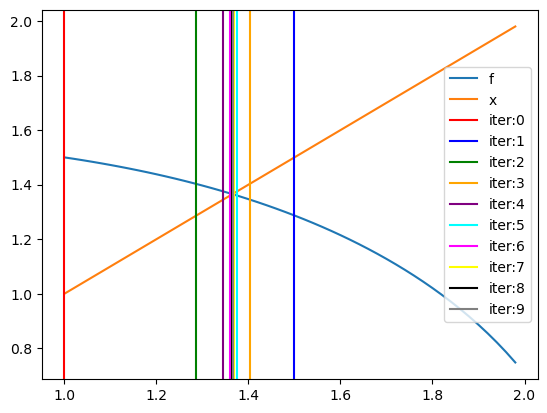

In [197]:
xs = np.arange(a,b, 0.02)
plt.plot(xs, f(xs), label = "f")
plt.plot(xs,r(xs), label = "x")

colores = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'gray']

for i,aprox in enumerate (lista):
    plt.axvline(aprox, label= f"iter:{i}", color=colores[i % len(colores)])
plt.legend()

- Aquí podemos ver, que una de las transformaciones nos ayuda a encontrar el punto fijo. 
### Destacado
- Podemos ver que no todas las funciones que no cumplen con el teorema, nos sirve para encontrar el punto fijo.
- Una de las tranformaciones, que no cumple con la condicion, puede servir para encontrar el punto fijo con el algoritmo.

### Teorema para asegurarnos que siempre podemos aproximar con el algoritmo

(Teorema de punto fijo)
Sea $g \in C[a, b]$ tal que $g(x) \in[a, b]$ para todas las $x$ en $[a, b]$. Suponga, además, que existe $g^{\prime}$ en $(a, b)$ y que existe una constante $0<k<1$ con
$$
\left|g^{\prime}(x)\right| \leq k, \quad \text { para todas } \quad x \in(a, b) .
$$

Entonces, para cualquier número $p_0$ en $[\mathrm{a}, \mathrm{b}]$, la sucesión definida por
$$
p_n=g\left(p_{n-1}\right), \quad n \geq 1,
$$
converge al único punto fijo $p$ en $[a, b]$.

### Demostración

 El teorema anterior implica que existe un único punto $p$ en $[a, b]$ con $g(p)=p$. Ya que $g$ mapea $[a, b]$ en sí mismo, la sucesión $\left\{p_n\right\}_{n=0}^{\infty}$ se define para todas las $n \geq 0$, y $p_n \in[a, b]$ para todas las $n$. Al utilizar el hecho de que $\left|g^{\prime}(x)\right| \leq k$ y el teorema de valor medio  tenemos, para cada $n$,
$$
\left|p_n-p\right|=\left|g\left(p_{n-1}\right)-g(p)\right|=\left|g^{\prime}\left(\xi_n\right)\right|\left|p_{n-1}-p\right| \leq k\left|p_{n-1}-p\right|,
$$
donde $\xi_n \in(a, b)$. Al aplicar esta desigualdad de manera inductiva obtenemos
$$
\left|p_n-p\right| \leq k\left|p_{n-1}-p\right| \leq k^2\left|p_{n-2}-p\right| \leq \cdots \leq k^n\left|p_0-p\right| .
$$

Ya que $0<k<1$, tenemos $\operatorname{lí}_{n \rightarrow \infty} k^n=0 \mathrm{y}$
$$
\lim _{n \rightarrow \infty}\left|p_n-p\right| \leq \lim _{n \rightarrow \infty} k^n\left|p_0-p\right|=0 .
$$

Por lo tanto, $\left\{p_n\right\}_{n=0}^{\infty}$ converge a $p$.

## Detalles

- Aquí el uso del teorema del valor medio es ligeramente distinto. Ya que no hay dos puntos fijos para pensar en que la pendiente es uno, si no utiliza para formar una cadena de desigualdades, que va tender a cero. Así ese acotamiento prueba que la sucesión tiene que converger.